In this project, we work with a real-world dataset from kaggle https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data and guide you through the complete Machine Learning pipeline — from data exploration to building classification models and enhancing their performance.

🔍 Introduction Breast cancer is one of the most common cancers affecting women worldwide. Early and accurate diagnosis is critical to improving patient outcomes. In this project, we explore the use of various classification algorithms to predict whether a tumor is benign or malignant using the Breast Cancer Wisconsin dataset.

🎯 Objective The main objective is to build and compare the performance of multiple machine learning models to identify the most accurate classifier for breast cancer diagnosis. The models evaluated incl

* Logistic Regression
* Support Vector Machine (SVM)
* K-Nearest Neighbors (KNN)
* 
Naive Baye
* Decision Tree
* Random Forest

📊 Evaluation Metrics We assess the performance of each model using the following metrics:

* Accuracy
* Precision
* Recall
* F1 Score
* Confusion Matrix

By comparing these metrics, we aim to select the best-performing model for breast cancer classification and provide insights into its effectiveness in medical diagnosis.sude:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load Data using Pandas

In [2]:
data = pd.read_csv(r"C:/Users/DELL/Desktop/Course/Machine Learning/Classification/data.csv")
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [5]:
data = data.drop(['id', 'Unnamed: 32'], axis=1)

In [6]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## EDA

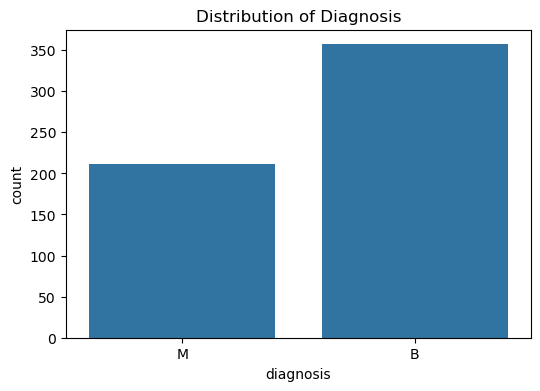

In [7]:
# Target variable distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='diagnosis', data=data)
plt.title('Distribution of Diagnosis')
plt.show()

In the above graph 'B' indicates person not suffering from cancer.
M'1' indicates person is suffering from canc.er

Less number of people are suffering from ca.ncer

Majority of the people are not suffering f.rom cancer

In [8]:
from sklearn.preprocessing import LabelEncoder
x_l = LabelEncoder()

data["diagnosis"] = x_l.fit_transform(data["diagnosis"])

data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


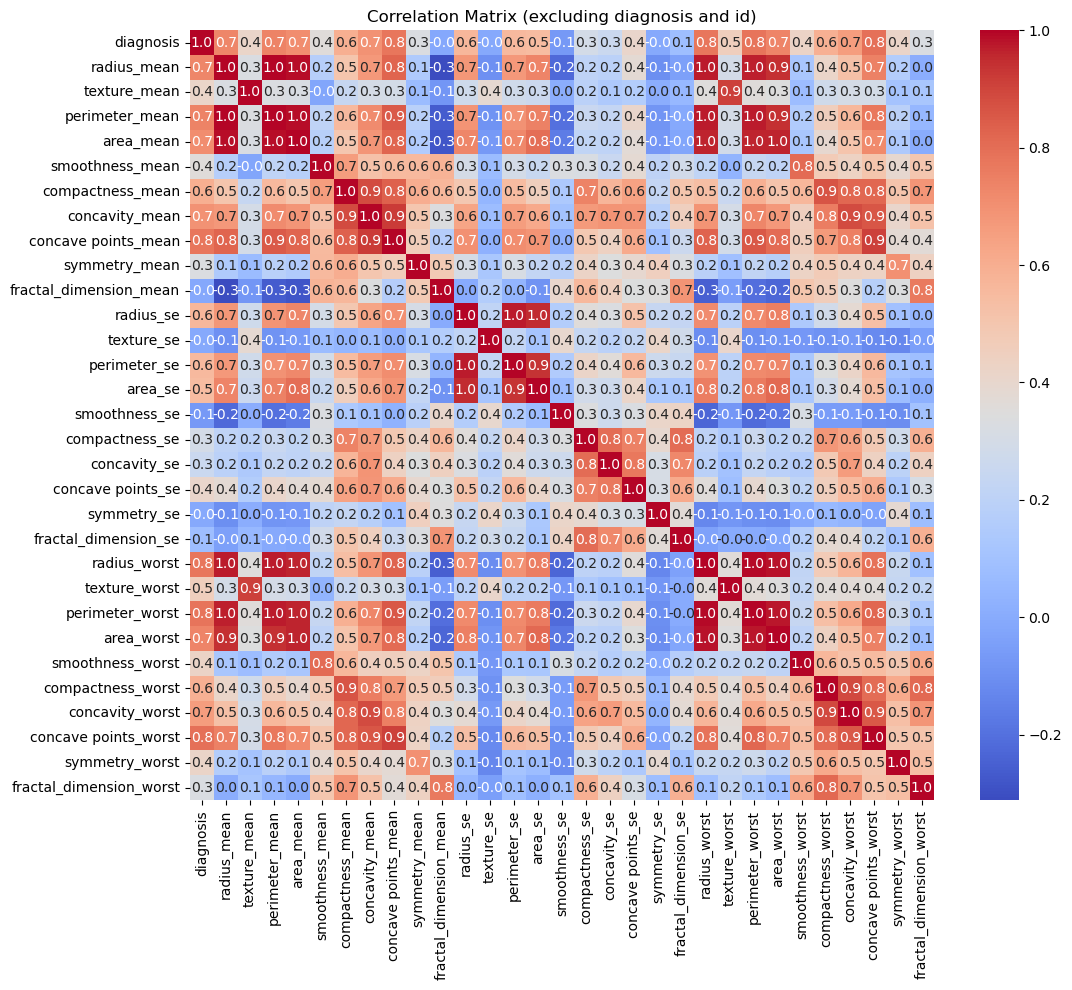

In [9]:
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".1f")
plt.title('Correlation Matrix (excluding diagnosis and id)')
plt.show()

These features have high positive correlation values with diagnosis, meaning higher values are typically associated with malignant tumors:

* area_mean
* radius_mean
* perimeter_mean
* concavity_mean
* concave points_mean
* area_worst
* radius_worst
* concave points_worst

These features are negatively correlated, meaning higher values are associated with benign tumors:

* smoothness_mean
* compactness_se
* symmetry_se
* fractal_dimension_se

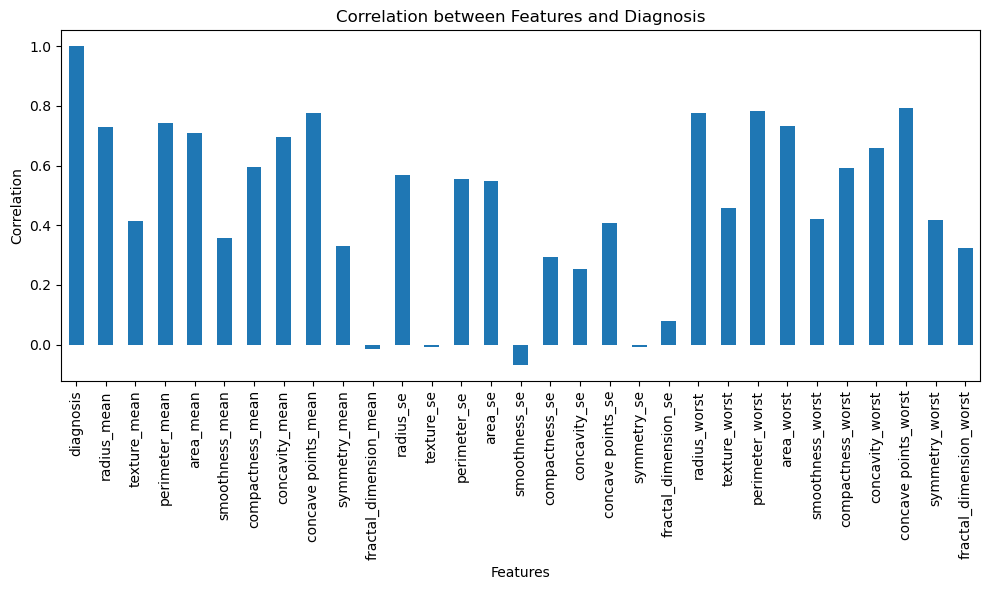

In [10]:
correlations = data.corr()['diagnosis']

# Bar plot of correlations
plt.figure(figsize=(10, 6))
correlations.plot(kind='bar')
plt.title('Correlation between Features and Diagnosis')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

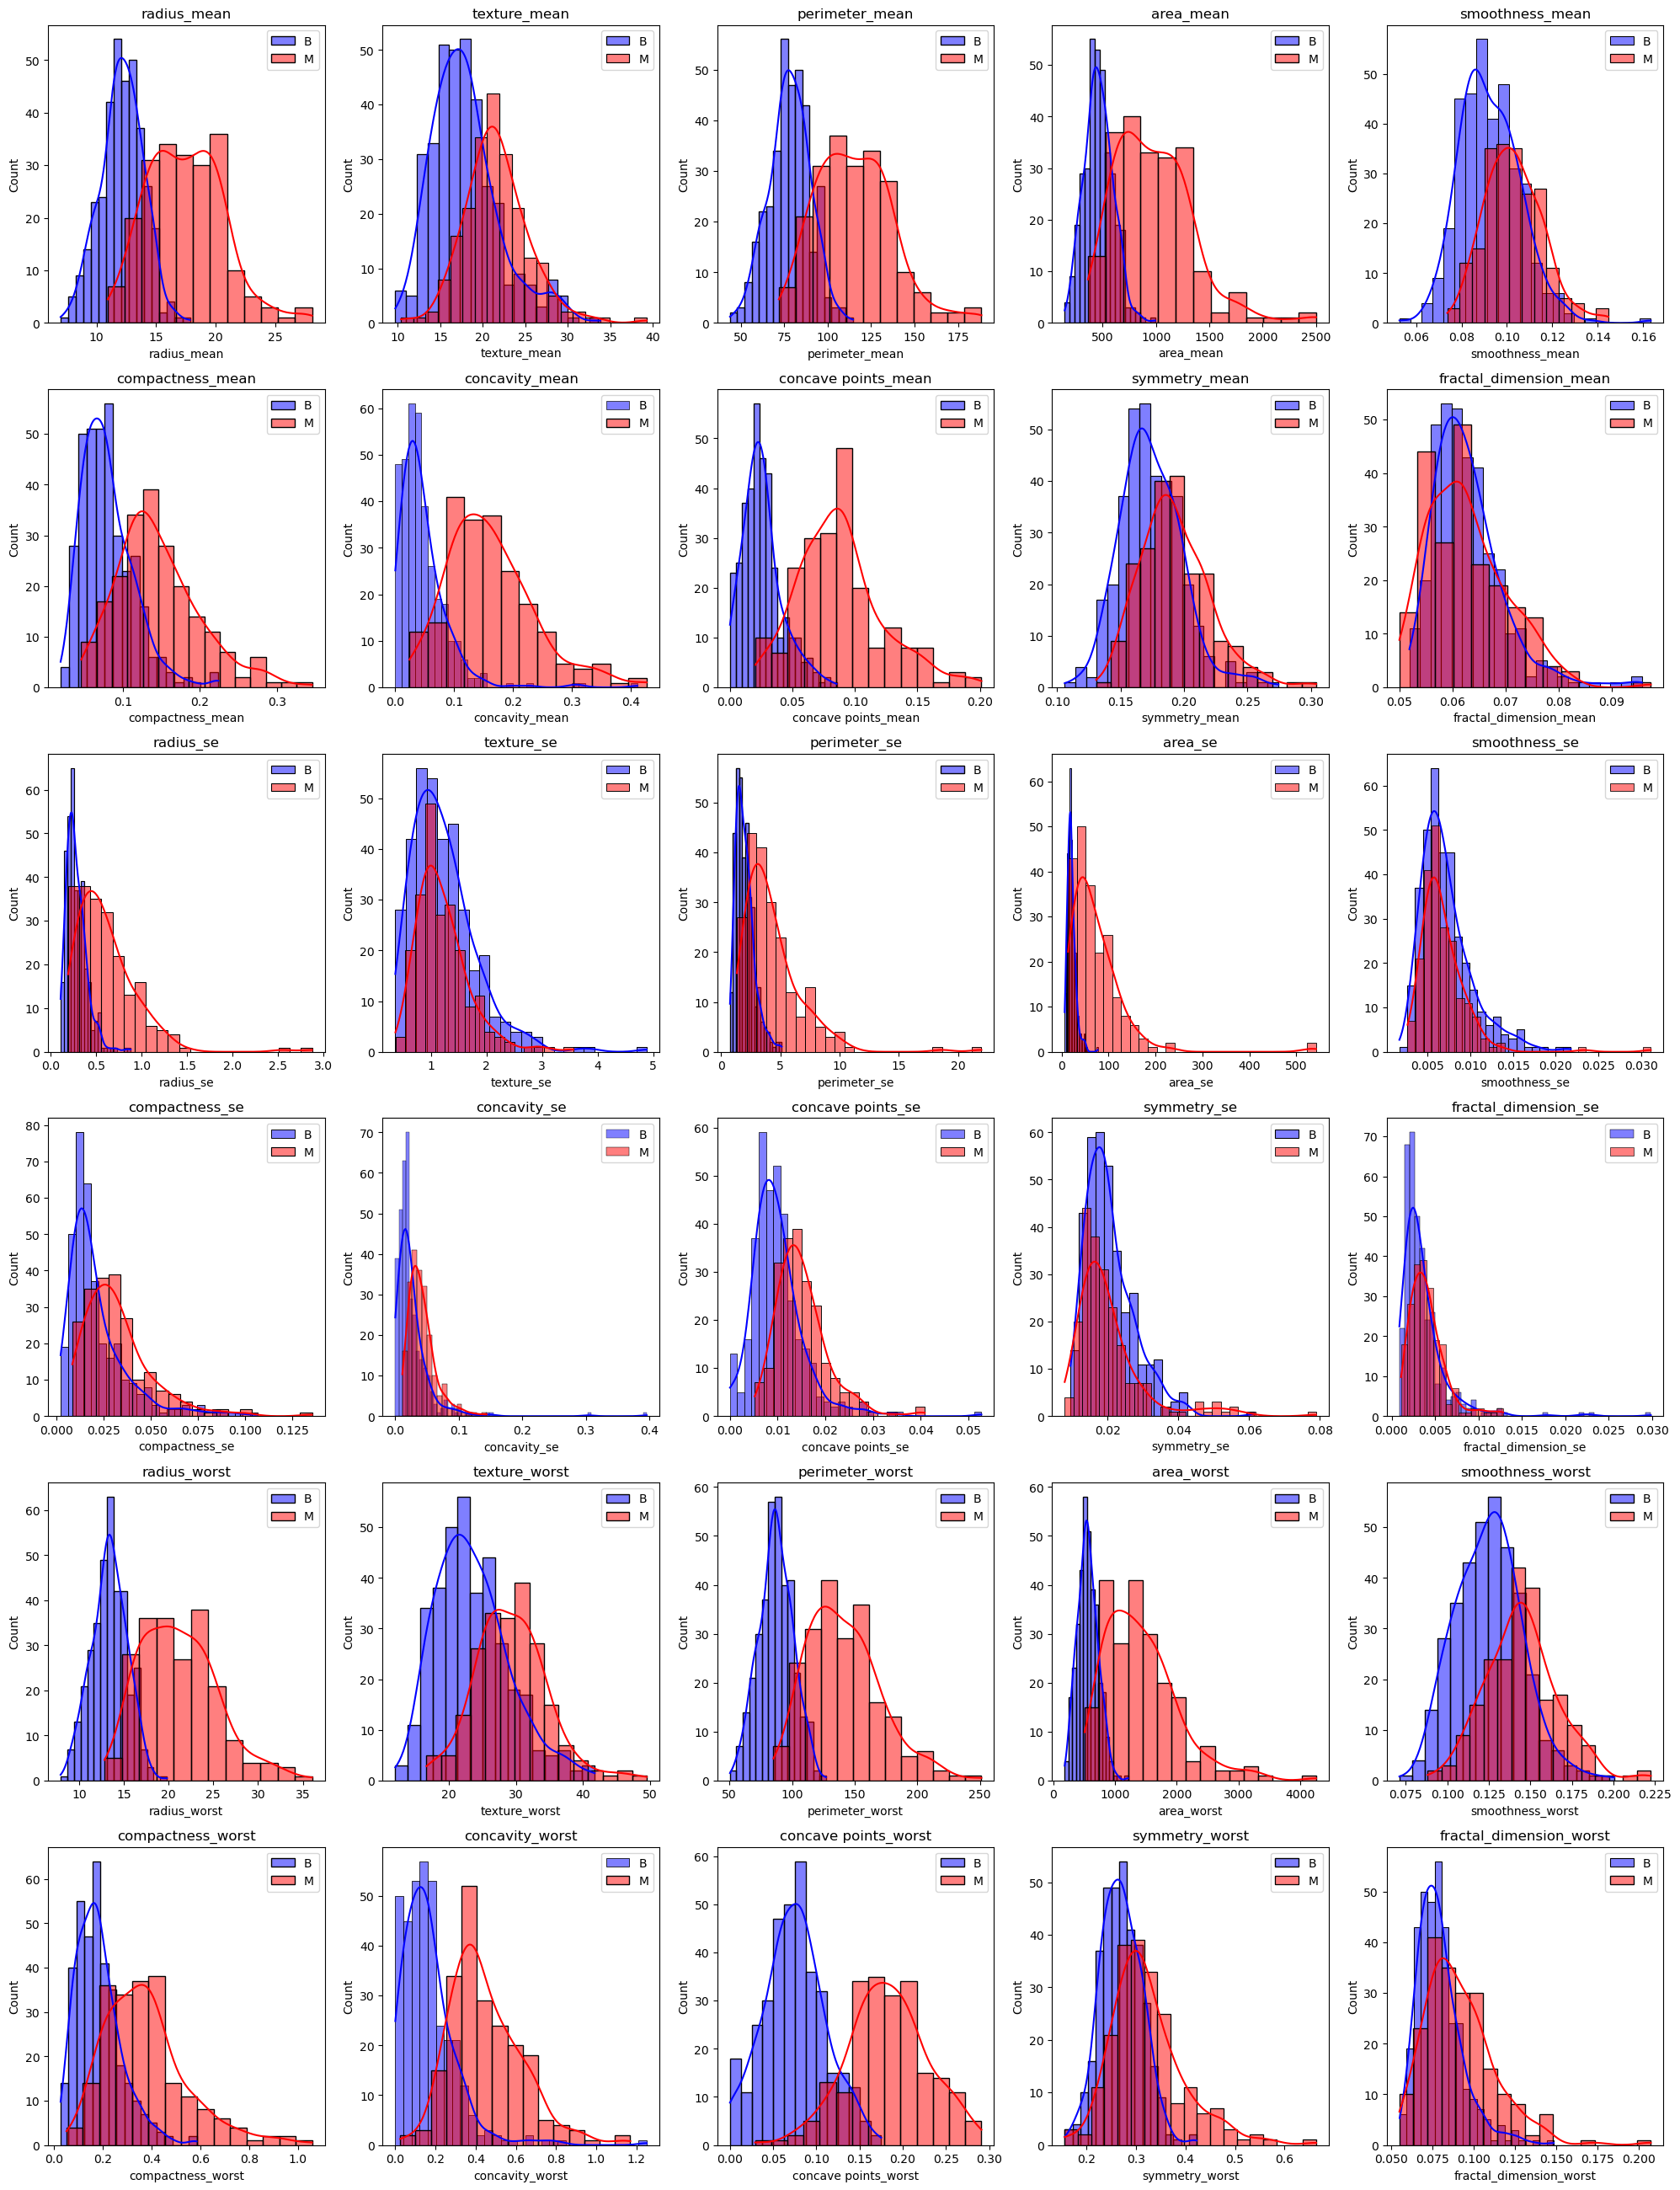

In [11]:
plt.figure(figsize=(20, 30))
for i, col in enumerate(data.columns[1:]):  # Exclude 'diagnosis'
    plt.subplot(7, 5, i + 1)
    plt.title(col)
    sns.histplot(data[data['diagnosis'] == 0][col], kde=True, color='blue', label='B')
    sns.histplot(data[data['diagnosis'] == 1][col], kde=True, color='red', label='M')
    plt.legend()
plt.tight_layout()
plt.show()

From the above plot, Many features such as area_mean, radius_mean, and perimeter_mean are right-skewed (i.e., long tail to the right). This indicates that most tumors are small/medium-sized, but a few large ones exist.

A right-skewed distribution (also called positively skewed) looks like this: Most of the data values are concentrated on the left side (lower values). The tail stretches out to the right, meaning a few data points have very high values. On a histogram, the peak is on the left and the bars gradually get smaller to the right.

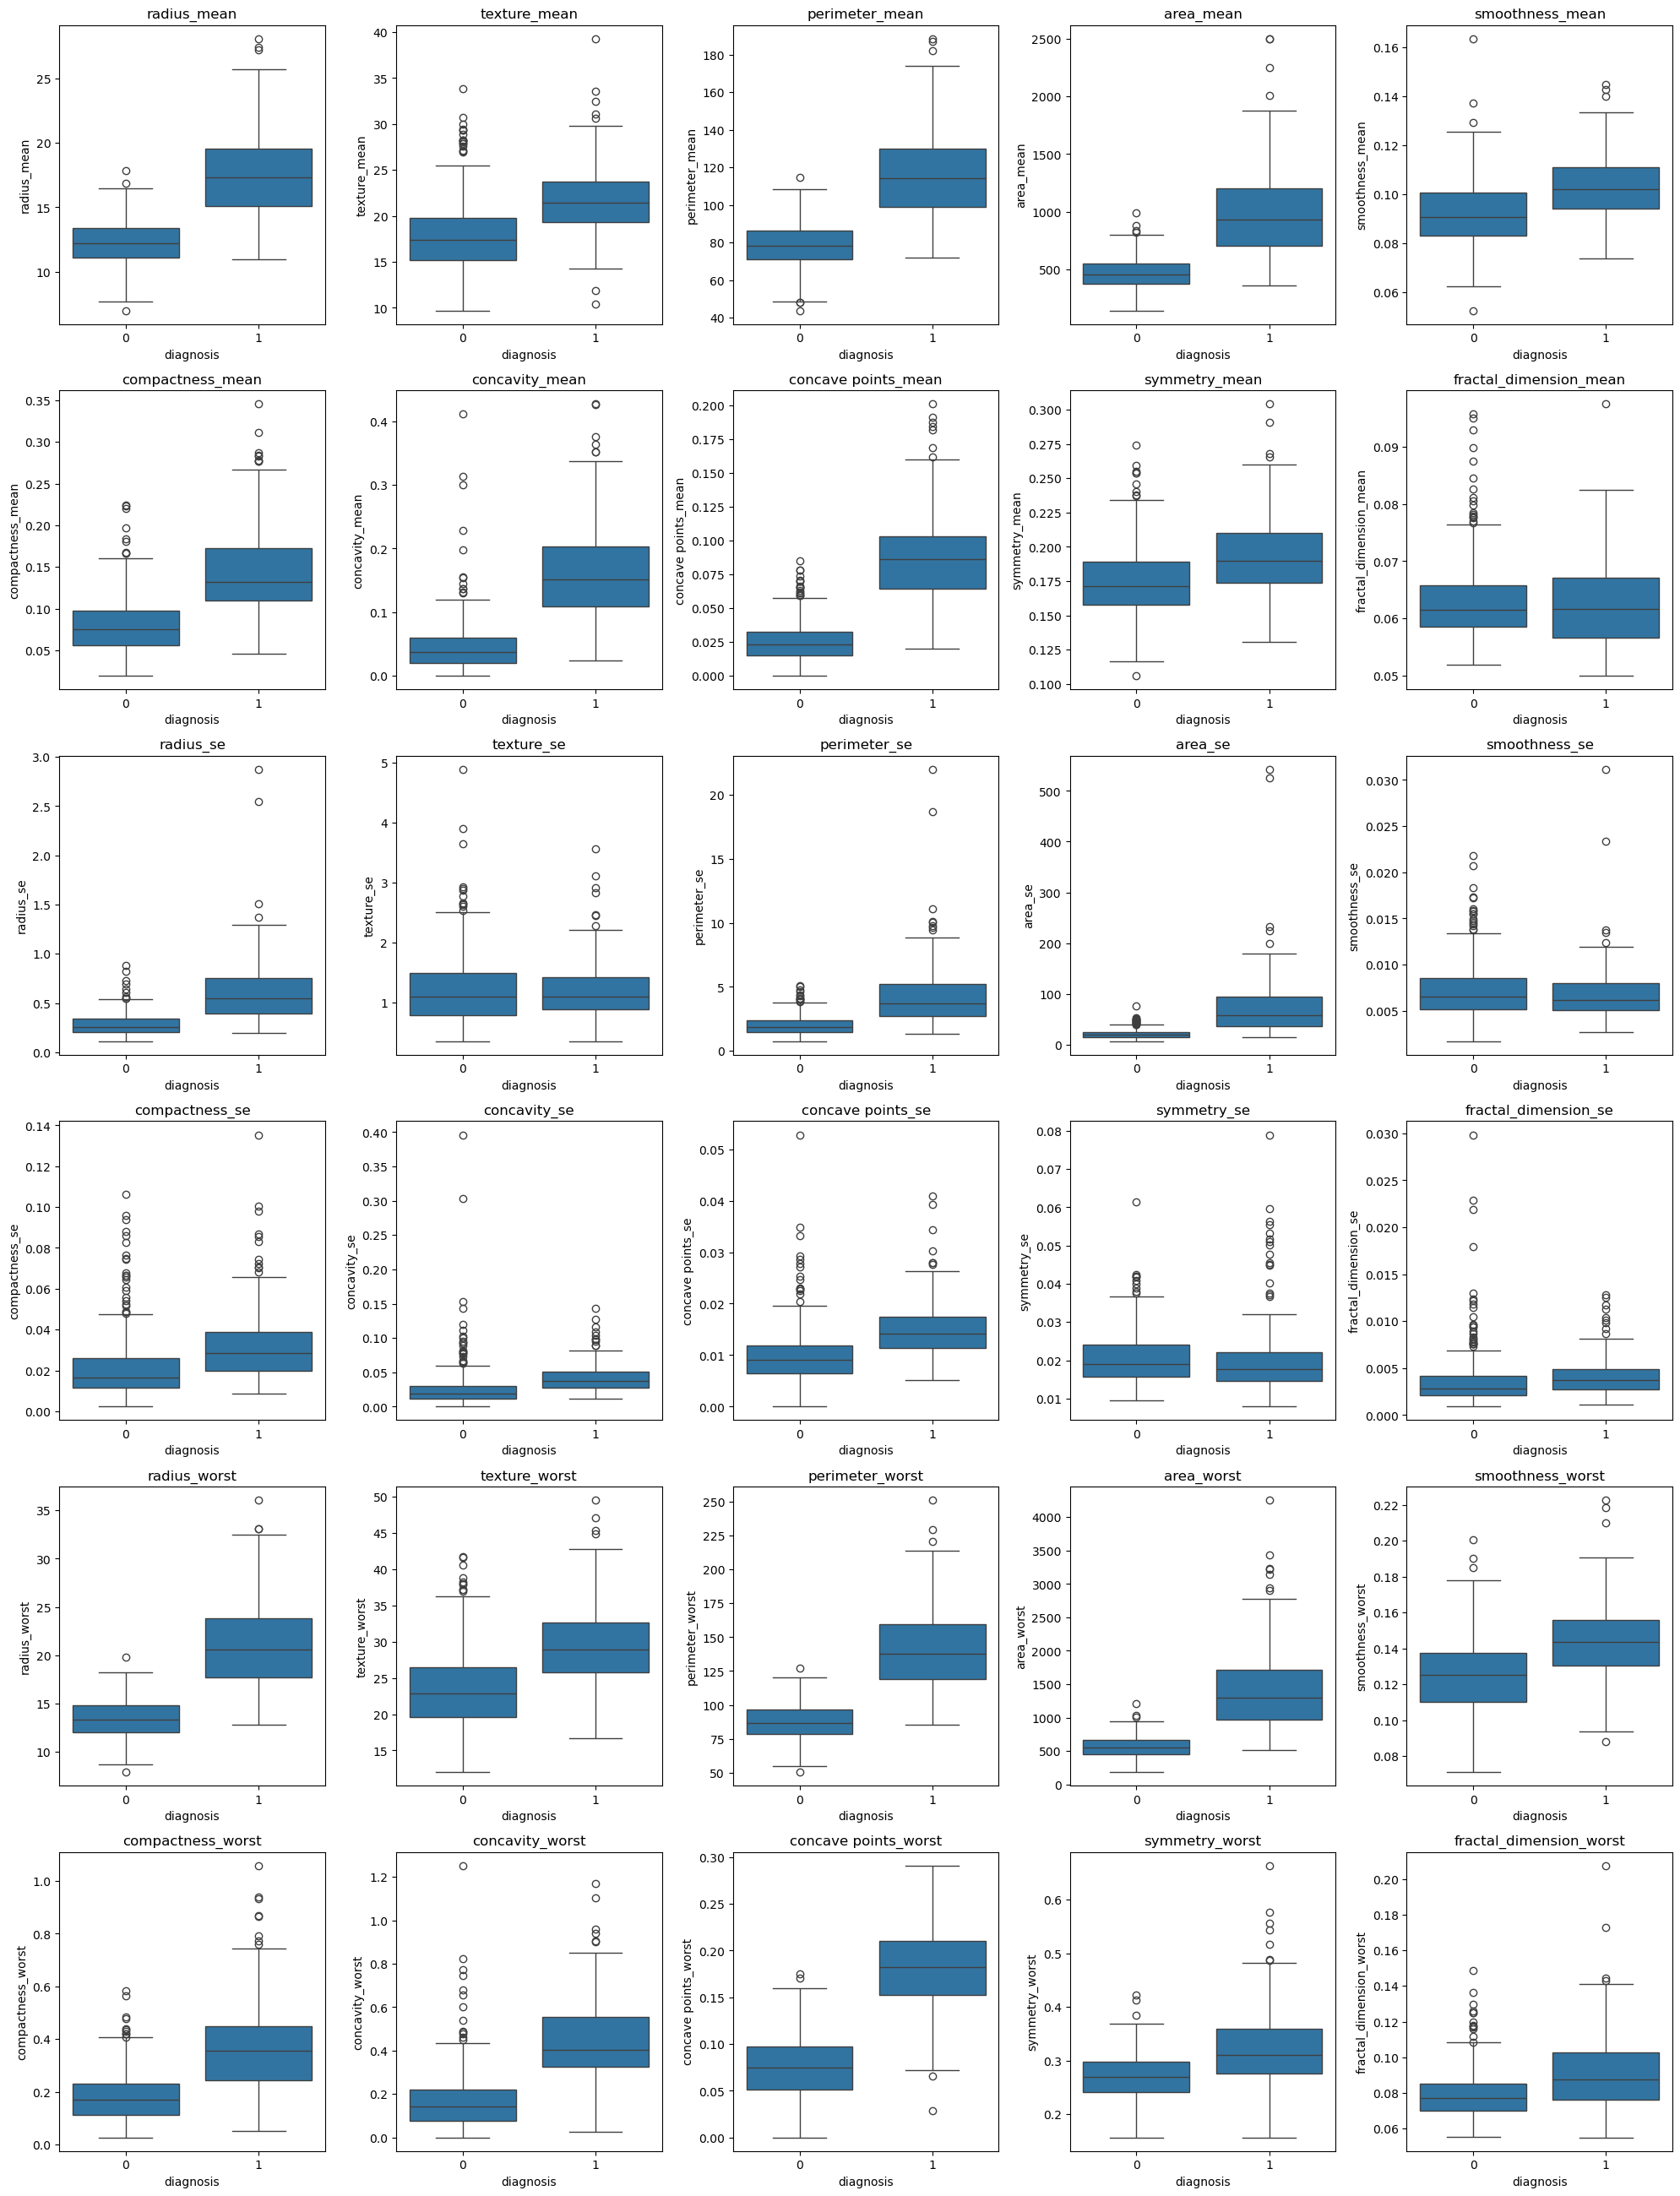

In [12]:
plt.figure(figsize=(20, 30))
for i, col in enumerate(data.columns[1:]):  # Exclude 'diagnosis'
    plt.subplot(7, 5, i + 1)
    plt.title(col)
    sns.boxplot(x='diagnosis', y=col, data=data)
plt.tight_layout()
plt.show()

* Some features (especially size-related ones like area_mean, radius_worst) show outliers, particularly in the malignant class.These extreme values may represent aggressive or advanced tumors.
  
* Some features (like smoothness_mean or fractal_dimension_se) may show significant overlap between benign and malignant cases. These features may not be useful on their own for classification but might contribute in combination with others.
  
* Based on visual separation in boxplots, the most discriminative features include:  
radius_mean  

area_mea  n

perimeter_m  ean

concavity  _mean

concave points_mean

These could be especially useful in building a classifier.

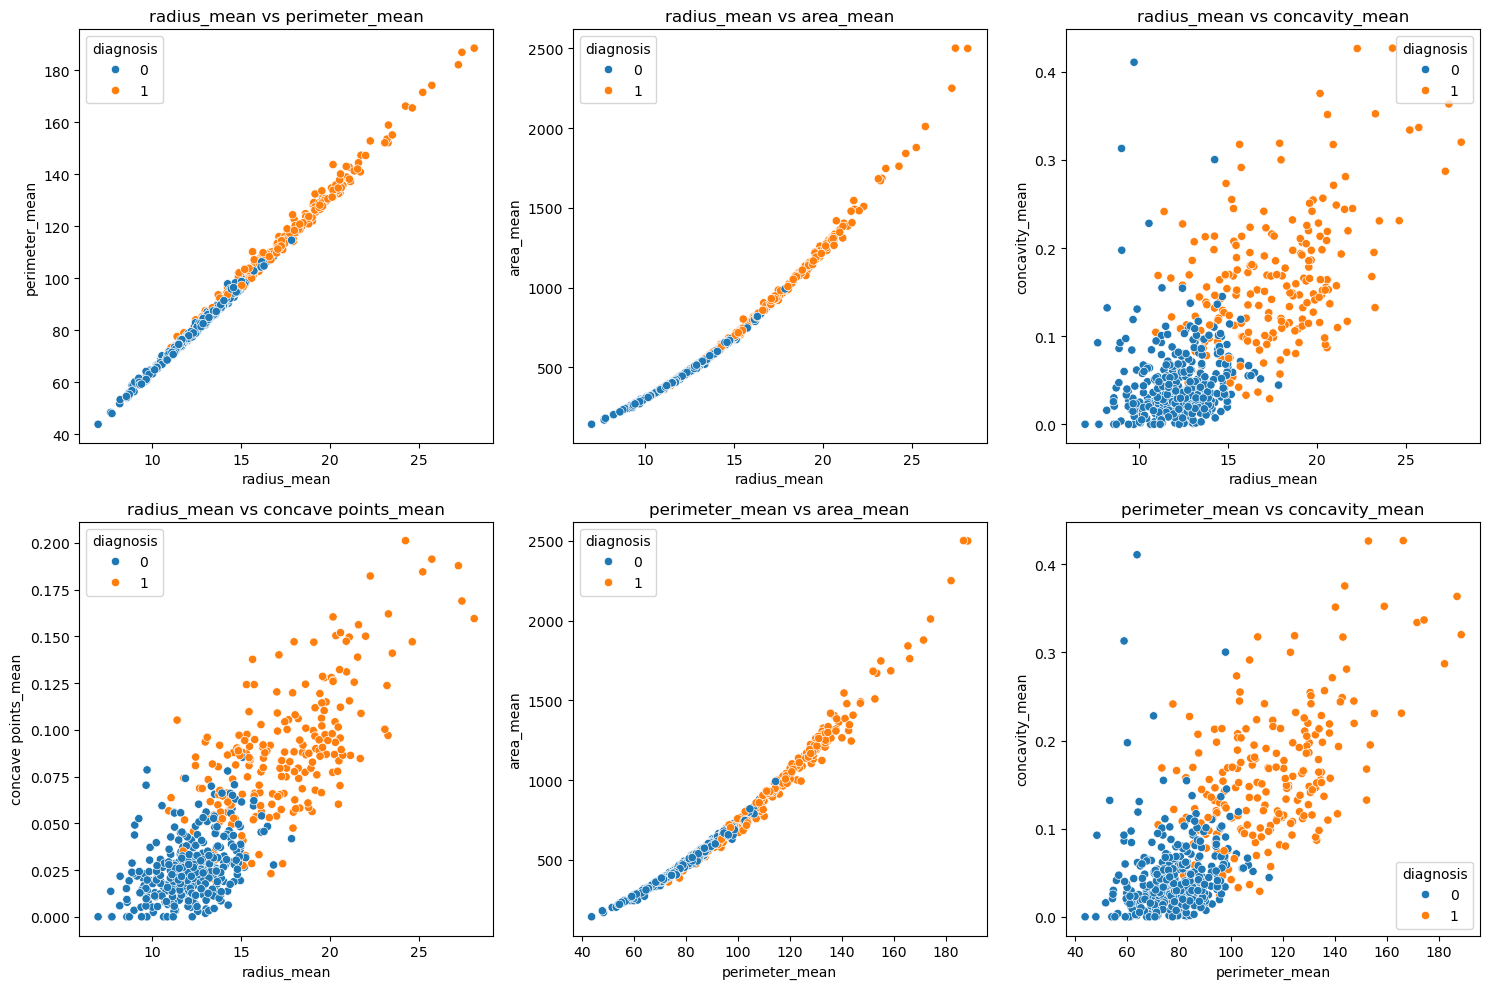

In [13]:
# Bivariate analysis: Scatter plots for selected feature pairs

selected_features = ['radius_mean', 'perimeter_mean', 'area_mean', 'concavity_mean', 'concave points_mean']
num_plots = len(selected_features) * (len(selected_features) - 1) // 2
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

k = 0
for i in range(len(selected_features)):
    for j in range(i + 1, len(selected_features)):
        if k < len(axes): 
            sns.scatterplot(x=selected_features[i], y=selected_features[j], hue='diagnosis', data=data, ax=axes[k])
            axes[k].set_title(f'{selected_features[i]} vs {selected_features[j]}')
            k += 1

plt.tight_layout()
plt.show()

🔍 Key Observations:
Strong Linear Relationships (Highly Correlated Features):

* radius_mean vs perimeter_mean

* radius_mean vs area_mean

* perimeter_mean vs area_mean

🔹 These relationships show near-linear trends, especially among malignant cases. This suggests that larger tumors (higher radius/perimeter) tend to have larger areas, which may indicate malignancy.

* Concavity and Concave Points:

* radius_mean vs concavity_mean

* radius_mean vs concave points_mean

* perimeter_mean vs concavity_mean

🔸 Malignant cases (orange) tend to cluster toward higher concavity values and concave points, showing that irregular shape features are more prominent in malignant tumors.

Class Separation:

* In most plots, benign (blue) and malignant (orange) points are well-separated along both axes.

* This indicates that these features are potentially good predictors for diagnosis.

✅ Conclusion:

* There are strong positive correlations among size-based features (radius, perimeter, area) — useful for dimensionality reduction or multicollinearity checks.

* Shape-related features like concavity_mean and concave points_mean show non-linear but informative patterns that differentiate benign from malignant tumors.

* These visual patterns strongly support the idea that both size and shape irregularities are critical for predicting cancer diagnosis.

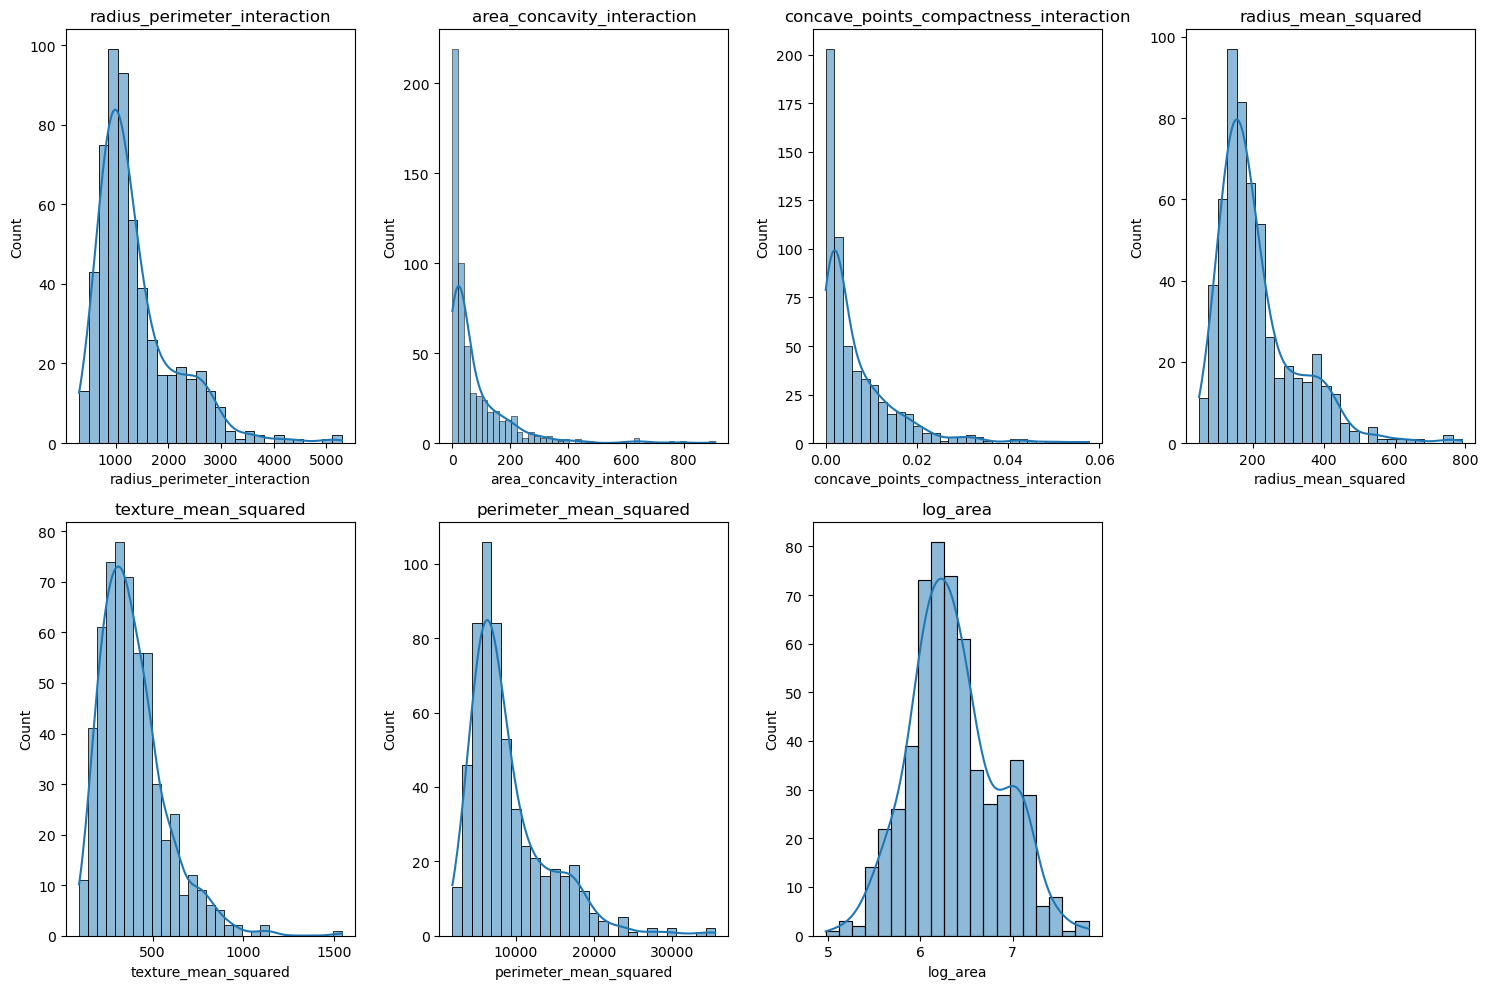

In [14]:
# Feature Engineering
data['radius_perimeter_interaction'] = data['radius_mean'] * data['perimeter_mean']
data['area_concavity_interaction'] = data['area_mean'] * data['concavity_mean']
data['concave_points_compactness_interaction'] = data['concave points_mean'] * data['compactness_mean']

# Polynomial features (degree 2)
for col in ['radius_mean', 'texture_mean', 'perimeter_mean']:
    data[f'{col}_squared'] = data[col] ** 2

# Log transformation for skewed features (example: 'area_mean')
data['log_area'] = np.log1p(data['area_mean'])  # Use log1p to avoid log(0)

# Evaluate engineered features
engineered_features = ['radius_perimeter_interaction', 'area_concavity_interaction', 'concave_points_compactness_interaction',
                      'radius_mean_squared', 'texture_mean_squared', 'perimeter_mean_squared', 'log_area']


# Histograms of engineered features
plt.figure(figsize=(15, 10))
for i, col in enumerate(engineered_features):
    plt.subplot(2, 4, i + 1)
    sns.histplot(data[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

1. New interaction and polynomial features were created to capture complex, non-linear relationships between existing features such as radius_mean, perimeter_mean, area_mean, and concavity_mean.

2. Log transformation was applied to area_mean to address skewness in its distribution, making it more suitable for statistical modeling or machine learning.

3. Histograms with KDE plots revealed the following:

* Some engineered features (like log_area and radius_perimeter_interaction) showed more normal or bell-shaped distributions, suggesting successful variance stabilization.

* Others (like squared features) remained positively skewed, indicating potential outliers or natural spread in feature magnitude.

4. Feature diversity was increased, which can potentially:

* Improve model performance by giving it access to higher-level patterns.

* Help distinguish between malignant and benign tumors more effectively (if this is based on the breast cancer dataset).

5. These engineered features can now be evaluated further for importance and predictive power using techniques like:

* Correlation with the target variable (diagnosis)

* Feature importance from tree-based models (like Random Forest)

* Recursive feature elimination or permutation importance

## Splitting the Data

In [15]:
x = data.iloc[:, 1:-1]
y = data.iloc[:, [0]]

In [16]:
x

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,radius_perimeter_interaction,area_concavity_interaction,concave_points_compactness_interaction,radius_mean_squared,texture_mean_squared,perimeter_mean_squared
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,0.7119,0.2654,0.4601,0.11890,2209.1720,300.400100,0.040835,323.6401,107.7444,15079.8400
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,0.2416,0.1860,0.2750,0.08902,2733.7530,115.229400,0.005518,423.1249,315.7729,17662.4100
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,0.4504,0.2430,0.3613,0.08758,2559.7000,237.472200,0.020451,387.6961,451.5625,16900.0000
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,0.6869,0.2575,0.6638,0.17300,885.9636,93.204540,0.029866,130.4164,415.3444,6018.6564
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,0.4000,0.1625,0.2364,0.07678,2741.1790,256.806000,0.013851,411.6841,205.6356,18252.0100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,0.4107,0.2216,0.2060,0.07115,3061.5200,360.728100,0.016099,464.8336,501.3121,20164.0000
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,0.3215,0.1628,0.2572,0.06637,2641.0560,181.584000,0.010124,405.2169,798.0625,17213.4400
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,0.3403,0.1418,0.2218,0.07820,1797.7800,79.382831,0.005424,275.5600,788.4864,11728.8900
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,0.9387,0.2650,0.4087,0.12400,2886.0600,444.521000,0.042104,424.3600,860.2489,19628.0100


In [17]:
y

,diagnosis
0,1
1,1
2,1
3,1
4,1
...,...
564,1
565,1
566,1
567,1


In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=23)

## Model Building

### 1. Logistic Regression

### 📌 Logistic Regression – Overview

**Logistic Regression** is a **supervised machine learning algorithm** used primarily for **binary classification problems**, where the output variable takes only two possible outcomes, such as 0/1 or True/False.

Examples include:
- Tumor classification (Benign = 0, Malignant = 1)
- Spam detection (Spam = 1, Not spam

---

### 🧠 How Logistic Regression Works

Logistic Regression estimates the **probability** that a given input point belongs to class 1 (positive class) by applying a **sigmoid (logistic) function** to a linear combination of inputtures.

---

### 📐 Formula

**1. Linear combination of features:**

\[
z = \beta_0 + \beta_1x_1 + \beta_2x_2 + \dots + \beta_nx_n
\]

**2. Sigmoid (Logistic) function:**

\[
\sigma(z) = \frac{1}{1 + e^{-z}}
\]

This maps any real-valued number to the (0, 1) range, which isrpreted as a probability.

---

### ✅ Classification Rule

\[
\hat{y} =
\begin{cases}
1 & \text{if } \sigma(z) \geq 0.5 \\
0 & \text{otherwise}
\end{cases}
\]

This means if the predicted probability is ≥ 0.5, classifylass 1; otherwise, classify as class 0.

---

### 📊 Why Logistic Regression?

- **Simple** and easy to implement  
- Outputs **probabilities**, useful for risk assessment  
- Good **baseline model** for classificatasks  
- Easy to interpret model coefficients

---

### 🛠 Logistic Regression in This Mini Project

In this breast cancer classification project, logistic regression was used to predict whether a tumor is **malignant (1)** or **benign (0)** based on key features like:

- `rad_mean`
- `concavity_mean`
- And additional engineered features


In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
clf = LogisticRegression(max_iter=10000, random_state=42)
clf.fit(x_train, y_train)

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=10000, random_state=42)

In [21]:
y_pred = clf.predict(x_test)
y_pred

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1])

In [22]:
clf.score(x_train, y_train)

0.9736263736263736

In [23]:
clf.score(x_test, y_test)

0.9649122807017544

In [24]:
# Evolution Metrics
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix

acc = accuracy_score(y_test, y_pred)
pre = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm= confusion_matrix(y_test, y_pred)

print(f"Accuracy: {acc:.4f}")
print(f"Precision: {pre:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix:")
print(cm)

Accuracy: 0.9649
Precision: 0.9487
Recall: 0.9487
F1 Score: 0.9487
Confusion Matrix:
[[73  2]
 [ 2 37]]


### 2. KNN

### 🔍 K-Nearest Neighbors (KNN)

**KNN** is a **lazy, non-parametric** algorithm used for classification and regression. It makes predictions based on the majority class among the k-nearest training data points in the feature space.

---

#### ✅ How It Works:
1. Choose a value for **k** (e.g., 3, 5, 7).
2. Calculate the **distance** (e.g., Euclidean) from the test point to all training points.
3. Select the **k closest points**.
4. Predict the label based on **majority voting**.

---

#### 📐 Formula (Euclidean Distance):
\[
d(p, q) = \sqrt{\sum_{i=1}^{n}(p_i - q_i)^2}
\]

---

#### 🧠 Characteristics:
- **Lazy Learner**: No training phase; computation is done during prediction.
- **Sensitive to Feature Scaling**: Normalize or standardize features before training.

---

#### 📊 Pros:
- Simple to implement and understand
- Works well for small datasets
- No assumptions about data distribution

#### ⚠️ Cons:
- Slow with large datasets
- Sensitive to irrelevant features and the choice of **k**

---

#### 🛠 Use Cases:
- Handwritten digit recognition
- Recommender systems
- Image classification


from sklearn.neighbors import KNeighborsClassifier

#### K = 3

In [26]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)
model.fit(x_train, y_train)

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=3)

In [27]:
model.score(x_test, y_test)

0.956140350877193

In [28]:
y_pred = model.predict(x_test)
y_pred

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1])

In [29]:
# Evolution Metrics
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix

acc = accuracy_score(y_test, y_pred)
pre = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm= confusion_matrix(y_test, y_pred)

print(f"Accuracy: {acc:.4f}")
print(f"Precision: {pre:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix:")
print(cm)

Accuracy: 0.9561
Precision: 0.9474
Recall: 0.9231
F1 Score: 0.9351
Confusion Matrix:
[[73  2]
 [ 3 36]]


#### K = 5

In [30]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(x_train, y_train)

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [31]:
model.score(x_test, y_test)

0.9649122807017544

In [32]:
y_pred = model.predict(x_test)
y_pred

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1])

In [33]:
# Evolution Metrics
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix

acc = accuracy_score(y_test, y_pred)
pre = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm= confusion_matrix(y_test, y_pred)

print(f"Accuracy: {acc:.4f}")
print(f"Precision: {pre:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix:")
print(cm)

Accuracy: 0.9649
Precision: 0.9487
Recall: 0.9487
F1 Score: 0.9487
Confusion Matrix:
[[73  2]
 [ 2 37]]


#### K = 7

In [34]:
model = KNeighborsClassifier(n_neighbors=7)
model.fit(x_train, y_train)

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=7)

In [35]:
model.score(x_test, y_test)

0.956140350877193

In [36]:
y_pred = model.predict(x_test)
y_pred

array([0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1])

In [37]:
# Evolution Metrics
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix

acc = accuracy_score(y_test, y_pred)
pre = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm= confusion_matrix(y_test, y_pred)

print(f"Accuracy: {acc:.4f}")
print(f"Precision: {pre:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix:")
print(cm)

Accuracy: 0.9561
Precision: 0.9474
Recall: 0.9231
F1 Score: 0.9351
Confusion Matrix:
[[73  2]
 [ 3 36]]


### 3. Naive Bayes

### 📚 Naive Bayes Classifier

Naive Bayes is a **probabilistic classifier** based on **Bayes' Theorem** with the assumption that all features are **conditionally independent** given the class label.

---

#### 📐 Bayes’ Theorem:
\[
P(y|X) = \frac{P(y) \cdot P(X|y)}{P(X)}
\]

With naive independence assumption:
\[
P(y|x_1, ..., x_n) \propto P(y) \cdot \prod_{i=1}^{n} P(x_i | y)
\]

---

#### 🧠 Characteristics:
- Works best when features are independent
- Fast to train and predict

---

#### 📊 Pros:
- Extremely fast and efficient
- Works well for high-dimensional data (e.g., text)
- Performs well with small training data

#### ⚠️ Cons:
- Assumes feature independence
- Not ideal for highly correlated features

---

#### 🛠 Use Cases:
- Spam filtering
- Sentiment analysis
- Document classification


In [38]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [39]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [40]:
gnb.fit(x_train, y_train)

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [41]:
y_pred = gnb.predict(x_test)
y_pred

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1])

In [42]:
# Evolution Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='macro')
rec = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
cm = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {acc:.4f}")
print(f"Precision (Macro): {prec:.4f}")
print(f"Recall (Macro): {rec:.4f}")
print(f"F1 Score (Macro): {f1:.4f}")
print("Confusion Matrix:")
print(cm)

Accuracy: 0.9649
Precision (Macro): 0.9733
Recall (Macro): 0.9535
F1 Score (Macro): 0.9619
Confusion Matrix:
[[71  0]
 [ 4 39]]


### 4. SVM(Support Vector Machine)

### 📈 Support Vector Machine (SVM)

**SVM** is a powerful supervised learning algorithm for binary and multiclass classification. It tries to find the **optimal hyperplane** that maximally separates different classes.

---

#### ✅ Key Concepts:
- **Hyperplane**: A decision boundary that separates data.
- **Support Vectors**: Data points closest to the hyperplane.
- **Margin**: Distance between the hyperplane and the support vectors.

---

#### 📐 Decision Function:
\[
f(x) = w \cdot x + b
\]

#### 📐 Objective:
\[
\min \frac{1}{2} \|w\|^2 \quad \text{subject to } y_i(w \cdot x_i + b) \geq 1
\]

---

#### 🧠 Characteristics:
- Can use **kernels** to work in higher-dimensional space.
- Common kernels: **linear**, **polynomial**, **RBF (Gaussian)**

---

#### 📊 Pros:
- Works well in high-dimensional data
- Effective with a clear margin of separation

#### ⚠️ Cons:
- Computationally intensive for large datasets
- Not ideal when classes are overlapping

---

#### 🛠 Use Cases:
- Text classification (spam detection)
- Face and image recognition
- Bioinformatics (e.g., cancer classification)


In [43]:
from sklearn.svm import SVC
reg = SVC()
reg

SVC()

In [44]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [45]:
reg.fit(x_train, y_train)

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [46]:
reg.score(x_train, y_train)

0.8791208791208791

In [47]:
reg.score(x_test, y_test)

0.9298245614035088

In [48]:
y_pred = reg.predict(x_test)
y_pred

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1])

In [49]:
# Evolution Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='macro')
rec = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
cm = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {acc:.4f}")
print(f"Precision (Macro): {prec:.4f}")
print(f"Recall (Macro): {rec:.4f}")
print(f"F1 Score (Macro): {f1:.4f}")
print("Confusion Matrix:")
print(cm)

Accuracy: 0.9298
Precision (Macro): 0.9494
Recall (Macro): 0.9070
F1 Score (Macro): 0.9221
Confusion Matrix:
[[71  0]
 [ 8 35]]


### 5. Decision Tree

### 🌳 Decision Tree Classifier

A Decision Tree uses a tree-like structure of decisions and their possible consequences. It splits the dataset into subsets based on feature values that result in **pure** (homogeneous) subsets.

---

#### ✅ Key Concepts:
- Nodes represent features
- Edges represent decision rules
- Leaves represent output class labels

---

#### 📐 Impurity Measures:
**Gini Index**:
\[
Gini = 1 - \sum_{i=1}^{n} p_i^2
\]

**Entropy**:
\[
Entropy = - \sum_{i=1}^{n} p_i \log_2(p_i)
\]

---

#### 📊 Pros:
- Easy to interpret and visualize
- No need for feature scaling
- Handles both numerical and categorical data

#### ⚠️ Cons:
- Prone to overfitting
- Small changes in data can result in a completely different tree

---

#### 🛠 Use Cases:
- Customer segmentation
- Risk assessment
- Medical diagnosis


In [50]:
from sklearn.tree import DecisionTreeClassifier
tr = DecisionTreeClassifier()
tr

DecisionTreeClassifier()

In [51]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [52]:
tr.fit(x_train, y_train)

DecisionTreeClassifier()

In [53]:
tr.score(x_train, y_train)

1.0

In [54]:
tr.score(x_test,y_test)

0.9473684210526315

In [55]:
y_pred = tr.predict(x_test)
y_pred

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1])

In [56]:
# Evolution Metrics
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix

acc = accuracy_score(y_test, y_pred)
pre = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm= confusion_matrix(y_test, y_pred)

print(f"Accuracy: {acc:.4f}")
print(f"Precision: {pre:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix:")
print(cm)

Accuracy: 0.9474
Precision: 0.9302
Recall: 0.9302
F1 Score: 0.9302
Confusion Matrix:
[[68  3]
 [ 3 40]]


### 6. Random Forest

### 🌲 Random Forest Classifier

Random Forest is an **ensemble method** that builds multiple **Decision Trees** and merges their outputs to improve classification accuracy and reduce overfitting.

---

#### ✅ Key Concepts:
- Each tree is trained on a **bootstrap sample** (random sampling with replacement).
- At each node, a **random subset of features** is considered for splitting.
- Final prediction by **majority voting** (classification) or **averaging** (regression).

---

#### 🧠 Characteristics:
- Reduces variance compared to a single decision tree
- Works well with missing values and outliers

---

#### 📊 Pros:
- High accuracy and generalization
- Less prone to overfitting
- Can handle large feature sets

#### ⚠️ Cons:
- Slower than a single tree
- Less interpretable

---

#### 🛠 Use Cases:
- Disease detection (e.g., cancer classification)
- Fraud detection
- Stock market prediction


In [57]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf

RandomForestClassifier()

In [58]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [59]:
rf.fit(x_train, y_train)

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

In [60]:
rf.score(x_train, y_train)

1.0

In [61]:
rf.score(x_test, y_test)

0.9649122807017544

In [62]:
y_pred = rf.predict(x_test)
y_pred

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1])

In [63]:
# Evolution Metrics
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix

acc = accuracy_score(y_test, y_pred)
pre = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm= confusion_matrix(y_test, y_pred)

print(f"Accuracy: {acc:.4f}")
print(f"Precision: {pre:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix:")
print(cm)

Accuracy: 0.9649
Precision: 0.9756
Recall: 0.9302
F1 Score: 0.9524
Confusion Matrix:
[[70  1]
 [ 3 40]]


C:\Users\DELL\AppData\Local\Temp\ipykernel_41156\3201964336.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='Model', y='Accuracy', data=df, palette='viridis')


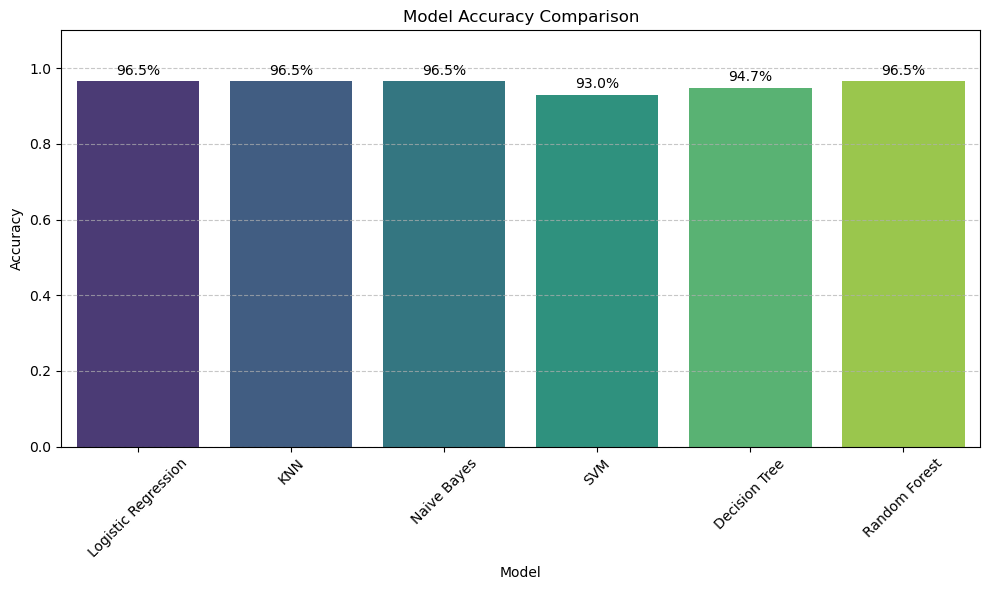

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Sample data
d = {
    'Model': ['Logistic Regression', 'KNN', 'Naive Bayes', 'SVM', 'Decision Tree', 'Random Forest'],
    'Accuracy': [0.9649, 0.9649, 0.9649, 0.9298, 0.9474, 0.9649]
}

df = pd.DataFrame(d)

# Plot
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='Model', y='Accuracy', data=df, palette='viridis')

# Add percentage labels on top of each bar
for i, bar in enumerate(barplot.patches):
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 0.01,  # slightly above the bar
        f'{height * 100:.1f}%',  # format as percentage
        ha='center',
        va='bottom',
        fontsize=10
    )

plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1.1)  # increased limit to accommodate text
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()